In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
choice = 3  #start from 0
devices = ['sg13_lv_nmos', 'sg13_lv_pmos', 'sg13_hv_nmos', 'sg13_hv_pmos']

# widths used for characterization
w = np.array([5, 5, 5, 5])

In [8]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
fet_name = par_names[1].split('[')[0]

# remove unwanted columns and rename for readability
df = df_raw.drop(['g', 'g.1', 'b', 'd', 'n'], axis=1)
df = df.apply(pd.to_numeric)
df.columns = df.columns.str.replace(fet_name, '')
df.columns = df.columns.str.replace(fet_name[1:], '')
df.columns = df.columns.str.replace('[dc]', '')
df.columns = df.columns.str.replace('onoise..', 'n')
df.columns = df.columns.str.removeprefix('@')
df.columns = df.columns.str.removeprefix('[')
df.columns = df.columns.str.removesuffix(']')
df

,cdd,cgb,cgd,cgdol,cgg,cgs,cgsol,cjd,cjs,css,...,gm,gmb,ids,l,sfl,sid,vth,vb,vd,vg
0,1.592000e-22,2.361000e-15,8.586000e-19,1.958000e-15,2.363000e-15,8.586000e-19,1.958000e-15,1.695000e-15,1.695000e-15,1.592000e-22,...,0.000000e+00,-0.000000e+00,0.000000e+00,4.500000e-07,0.000000e+00,5.598000e-32,0.6339,0.0,0.000,0.0
1,2.046000e-23,1.999000e-15,4.243000e-19,1.958000e-15,2.000000e-15,4.243000e-19,1.958000e-15,1.588000e-15,1.588000e-15,2.046000e-23,...,0.000000e+00,-0.000000e+00,0.000000e+00,4.500000e-07,0.000000e+00,7.180000e-33,0.6750,-0.2,0.000,0.0
2,3.618000e-24,1.772000e-15,2.459000e-19,1.958000e-15,1.773000e-15,2.459000e-19,1.958000e-15,1.509000e-15,1.509000e-15,3.618000e-24,...,0.000000e+00,-0.000000e+00,0.000000e+00,4.500000e-07,0.000000e+00,1.267000e-33,0.7124,-0.4,0.000,0.0
3,7.835000e-25,1.613000e-15,1.575000e-19,1.958000e-15,1.614000e-15,1.575000e-19,1.958000e-15,1.447000e-15,1.447000e-15,7.835000e-25,...,0.000000e+00,-0.000000e+00,0.000000e+00,4.500000e-07,0.000000e+00,2.741000e-34,0.7469,-0.6,0.000,0.0
4,6.085000e-23,2.361000e-15,-1.095000e-17,1.955000e-15,2.363000e-15,1.258000e-17,1.958000e-15,1.679000e-15,1.695000e-15,1.625000e-22,...,1.351000e-12,6.254000e-13,5.484000e-14,4.500000e-07,3.319000e-34,3.968000e-32,0.6339,0.0,0.025,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707555,1.840000e-16,2.554000e-15,1.674000e-16,1.961000e-15,4.828000e-14,4.556000e-14,2.075000e-15,1.053000e-15,1.447000e-15,3.153000e-14,...,3.528000e-04,9.955000e-05,5.283000e-04,3.000000e-06,1.183000e-17,5.792000e-24,0.7547,-0.6,3.275,3.3
707556,2.237000e-16,2.131000e-15,2.114000e-16,1.958000e-15,4.875000e-14,4.641000e-14,2.075000e-15,1.089000e-15,1.695000e-15,3.268000e-14,...,3.623000e-04,1.142000e-04,5.925000e-04,3.000000e-06,1.337000e-17,6.300000e-24,0.5892,0.0,3.300,3.3
707557,2.068000e-16,2.351000e-15,1.929000e-16,1.958000e-15,4.857000e-14,4.603000e-14,2.075000e-15,1.076000e-15,1.588000e-15,3.221000e-14,...,3.597000e-04,1.094000e-04,5.702000e-04,3.000000e-06,1.287000e-17,6.117000e-24,0.6489,-0.2,3.300,3.3
707558,1.907000e-16,2.478000e-15,1.750000e-16,1.958000e-15,4.841000e-14,4.576000e-14,2.075000e-15,1.063000e-15,1.509000e-15,3.184000e-14,...,3.565000e-04,1.044000e-04,5.488000e-04,3.000000e-06,1.236000e-17,5.949000e-24,0.7037,-0.4,3.300,3.3


In [9]:
# sweep variable vectors
l =   np.unique(df['l'])
vgs = np.unique(df['vg'])
vds = np.unique(df['vd'])
vsb = np.unique(-df['vb'])

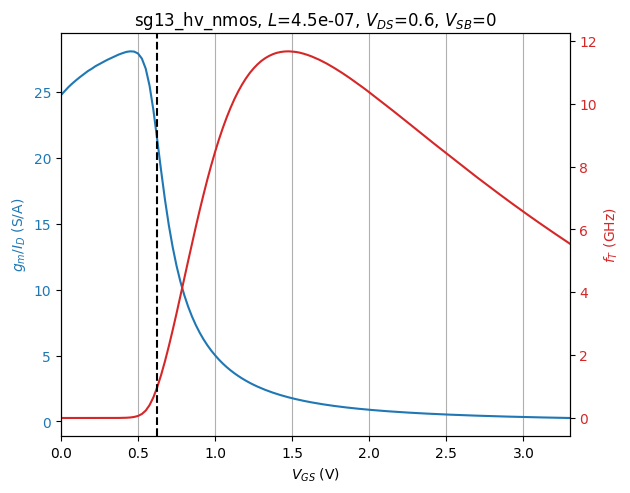

In [10]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=0.6; VSB1=0
df1 = df.loc[(df['l'] == L1) & (df['vd'] == VDS1)& (df['vb'] == -VSB1)]
gm_id1 = df1['gm'].values/df1['ids'].values
cgg1 = df1['cgg'].values + df1['cgsol'].values + df1['cgdol'].values
ft1 = df1['gm'].values/cgg1/2/np.pi
fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, max(vgs))
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

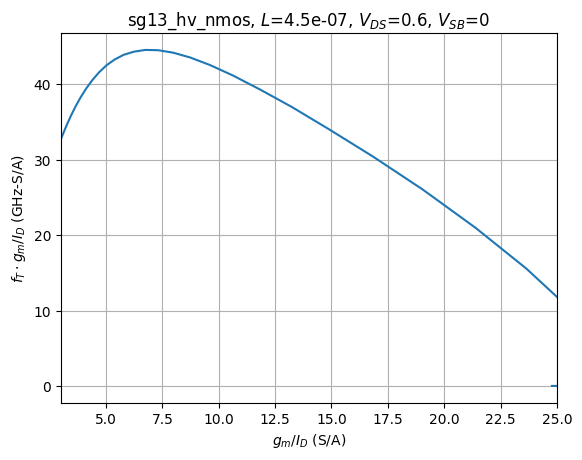

In [11]:
# plot product of gm/ID and fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

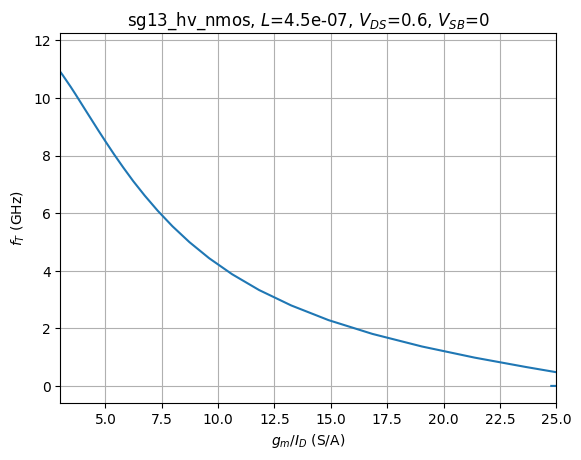

In [12]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

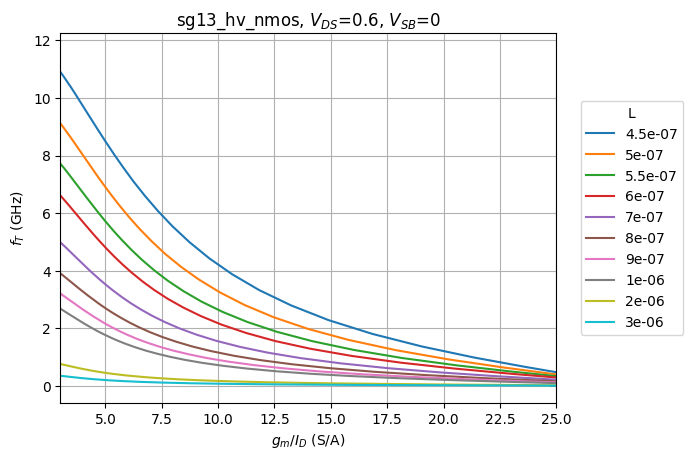

In [13]:
# plot fT versus gm/ID for all L
VDS2=0.6; VSB2=0
df2 = df.loc[ (df['vd'] == VDS2) & (df['vb'] == -VSB2)]
df2
gm_id2 = df2['gm'].values/df2['ids'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
ft2 = df2['gm'].values/(df2['cgg'].values + df2['cgsol'].values + df2['cgdol'].values)/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

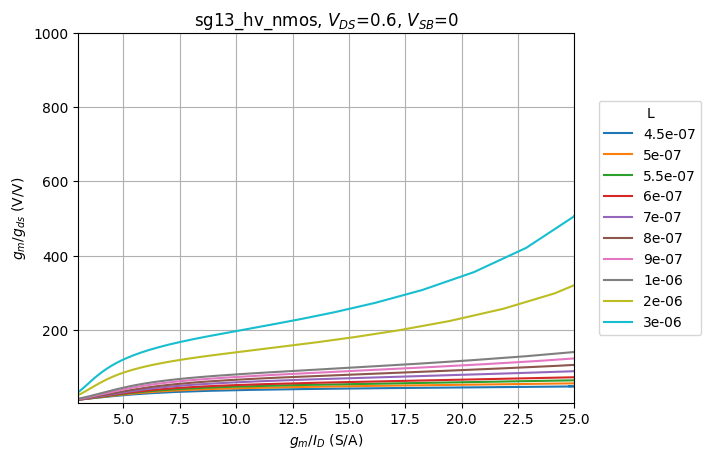

820.4642349597347


In [14]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(3, 1000)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()
print(np.amax(gm_gds2))

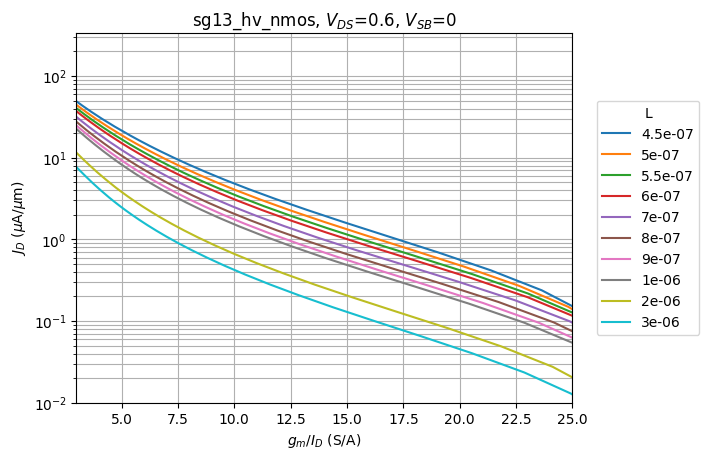

In [15]:
# plot jd versus gm/ID for all L
jd2 = df2['ids'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(1e-2, np.amax(jd2))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

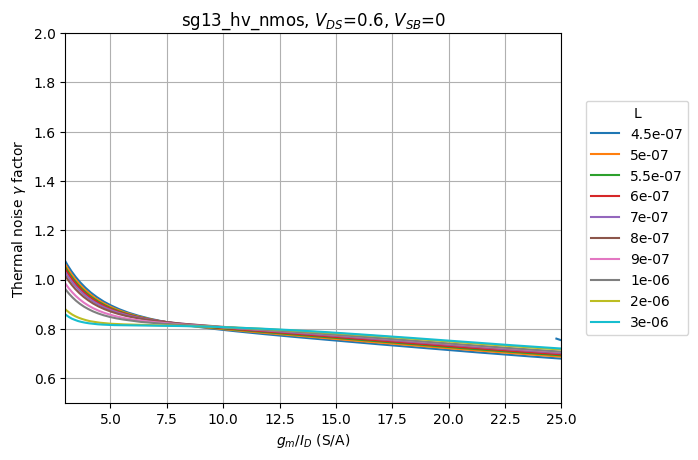

In [16]:
# plot gamma versus gm/ID for all L
gamma = df2['sid'].values / df2['gm'].values/4/300/1.38e-23
gamma = np.reshape(gamma, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gamma)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(0.5, 2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

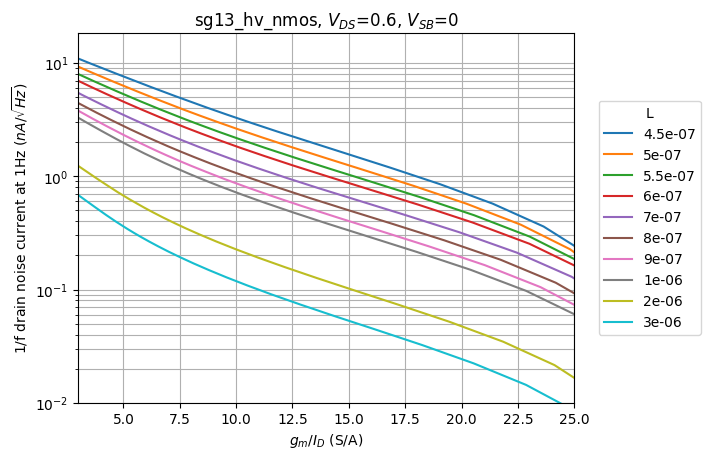

In [17]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
n1overf = df2['sfl'].values
n1overf = np.reshape(n1overf, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, np.sqrt(n1overf)/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(1e-2, np.amax(np.sqrt(n1overf)/1e-9))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

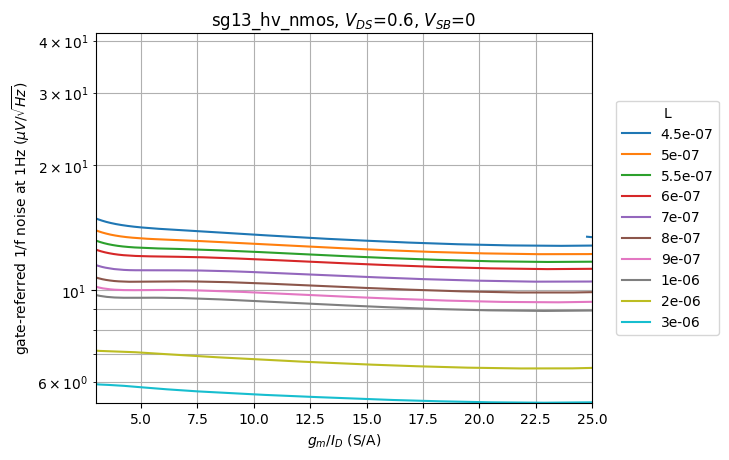

In [18]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
n1overf_gate = df2['sfl'].values / df2['gm'].values**2
n1overf_gate = np.reshape(n1overf_gate, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, np.sqrt(n1overf_gate)/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.ylim(np.amin(np.sqrt(n1overf_gate)/1e-6), np.amax(np.sqrt(n1overf_gate)/1e-6))
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()